<a href="https://colab.research.google.com/github/ysjsean/SalesAnalysis/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
import io

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

In [ ]:
url1 = "https://raw.githubusercontent.com/ysjsean/SalesAnalysis/main/table1.csv" # Make sure the url is the raw version of the file on GitHub
url2 = "https://raw.githubusercontent.com/ysjsean/SalesAnalysis/main/table2.csv" # Make sure the url is the raw version of the file on GitHub
download1 = req.get(url1).content
download2 = req.get(url2).content
staff_details_df = pd.read_csv(io.StringIO(download1.decode('utf-8')), sep="," ,index_col= 'uid')
staff_sales_df = pd.read_csv(io.StringIO(download2.decode('utf-8')), sep=",")

In [ ]:
staff_details_df

,gender,datejoin,college,paygrade,basesalary,commission,left
uid,,,,,,,
10001,1,2016-01-03,False,A,1000,0.3,False
10002,1,2016-01-28,False,C,600,0.5,False
10003,1,2016-03-28,False,C,600,0.5,False
10004,1,2016-05-10,False,C,600,0.5,True
10005,0,2016-05-12,False,B,800,0.4,False
...,...,...,...,...,...,...,...
10096,0,2022-08-09,False,B,800,0.4,False
10097,1,2022-09-23,False,C,600,0.5,False
10098,1,2022-09-28,False,A,1000,0.3,False


In [ ]:
staff_sales_df

,time,uid2,amount,sku
0,2023-01-01 08:02:45,10087,85.22,4
1,2023-01-01 08:07:43,10013,60.79,3
2,2023-01-01 08:15:29,10030,43.18,5
3,2023-01-01 08:18:21,10052,47.78,3
4,2023-01-01 08:21:53,10085,61.91,2
...,...,...,...,...
4648,2023-01-30 21:19:22,10079,20.73,2
4649,2023-01-30 21:35:17,10023,38.41,3
4650,2023-01-30 21:41:28,10012,38.03,4
4651,2023-01-30 21:43:13,10025,94.46,5


# Basic Exploration

In [ ]:
print("(Rows, columns): " + str(staff_details_df.shape))
staff_details_df.columns

(Rows, columns): (100, 7)


Index(['gender', 'datejoin', 'college', 'paygrade', 'basesalary', 'commission',
       'left'],
      dtype='object')

In [ ]:
# Display the Missing Values

print(staff_details_df.isna().sum())

gender        0
datejoin      0
college       0
paygrade      0
basesalary    0
commission    0
left          0
dtype: int64


In [ ]:
staff_details_df.describe()

,gender,basesalary,commission
count,100.000000,100.000000,100.000000
mean,0.510000,796.000000,0.402000
std,0.502418,163.249824,0.081625
min,0.000000,600.000000,0.300000
25%,0.000000,600.000000,0.300000
50%,1.000000,800.000000,0.400000
75%,1.000000,1000.000000,0.500000
max,1.000000,1000.000000,0.500000


In [ ]:
print("(Rows, columns): " + str(staff_sales_df.shape))
staff_sales_df.columns

(Rows, columns): (4653, 4)


Index(['time', 'uid2', 'amount', 'sku'], dtype='object')

In [ ]:
# Display the Missing Values

print(staff_sales_df.isna().sum())

time      0
uid2      0
amount    0
sku       0
dtype: int64


In [ ]:
staff_sales_df = staff_sales_df.rename({'uid2': 'uid'}, axis=1)

In [ ]:
staff_sales_df.describe()

,uid,amount,sku
count,4653.000000,4653.000000,4653.000000
mean,10048.406619,43.698721,4.056308
std,28.981933,22.553332,1.760929
min,10001.000000,2.010000,1.000000
25%,10023.000000,26.840000,3.000000
50%,10048.000000,43.050000,4.000000
75%,10073.000000,58.530000,5.000000
max,10100.000000,135.430000,11.000000


# Feature

In [ ]:
sales_amount_desc = staff_sales_df.groupby('uid')['amount'].sum().sort_values(ascending=False)
top5 = sales_amount_desc[:5]
bottom5 = sales_amount_desc[-5:]
bottom5

uid
10083    1166.29
10068    1165.87
10061    1134.35
10036    1113.15
10098     797.19
Name: amount, dtype: float64

In [ ]:
total_sales_by_id = staff_sales_df.groupby('uid')['amount'].sum()

In [ ]:
df = pd.merge(staff_details_df, total_sales_by_id, on='uid', how='left')
df = df.fillna(0)
df

,gender,datejoin,college,paygrade,basesalary,commission,left,amount
uid,,,,,,,,
10001,1,2016-01-03,False,A,1000,0.3,False,1741.49
10002,1,2016-01-28,False,C,600,0.5,False,4177.69
10003,1,2016-03-28,False,C,600,0.5,False,4007.14
10004,1,2016-05-10,False,C,600,0.5,True,0.00
10005,0,2016-05-12,False,B,800,0.4,False,3053.53
...,...,...,...,...,...,...,...,...
10096,0,2022-08-09,False,B,800,0.4,False,2576.15
10097,1,2022-09-23,False,C,600,0.5,False,3010.80
10098,1,2022-09-28,False,A,1000,0.3,False,797.19


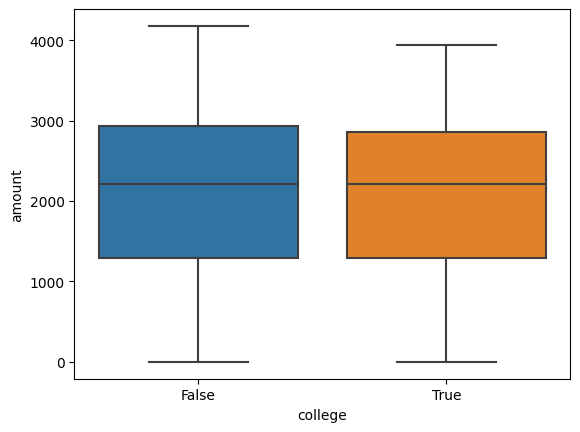

In [ ]:
sns.boxplot(y=df['amount'], x=df['college'])
plt.show()

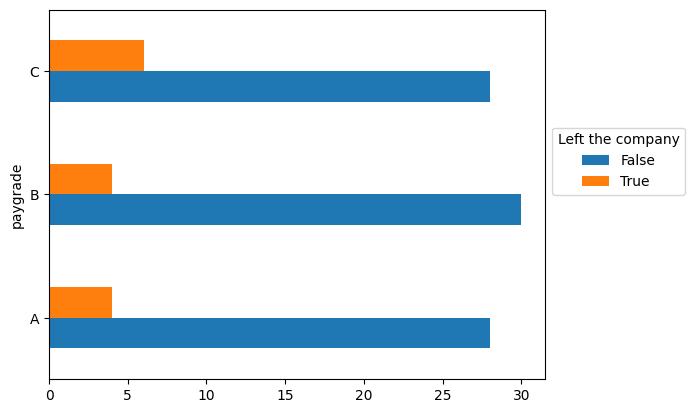

In [ ]:
retention = df.groupby(['paygrade', 'left']).size().unstack()

retention.plot(kind='barh', stacked=False, legend=True)
plt.legend(title='Left the company', bbox_to_anchor=(1.0, 0.7))
